In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
proj = '44Ca'
trg = '159Tb'
cn = '203At'
bf = '0.69'
ch = 'xn'
sigr = '3.2'

file_name10 = proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_barfac' + bf + '_sigr' + sigr + '.dat'
file_name0 = proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_barfac' + bf + '_sigr' + sigr + '.dat'
print(file_name10, file_name0)

44Ca_159Tb_203At_xn_IFUS10_barfac0.69_sigr3.2.dat 44Ca_159Tb_203At_xn_IFUS0_barfac0.69_sigr3.2.dat


In [131]:
df10 = pd.read_csv('data/' + file_name10, sep='\t')
df0 = pd.read_csv('data/' + file_name0, sep='\t')

In [132]:
df10.head()

,E_lab,E*/MeV,197At,198At,199At,200At,201At,202At,203At
0,163.609,29.0,0.0,0.0,0.0,1.410000e-09,0.000001,2.290000e-08,9.590000e-12
1,164.886,30.0,0.0,0.0,0.0,4.880000e-08,0.000006,6.760000e-08,2.080000e-11
2,166.163,31.0,0.0,0.0,0.0,9.200000e-07,0.000026,1.910000e-07,3.460000e-11
3,167.440,32.0,0.0,0.0,0.0,1.080000e-05,0.000109,5.170000e-07,0.000000e+00
4,168.716,33.0,0.0,0.0,0.0,8.630000e-05,0.000409,1.330000e-06,0.000000e+00


In [151]:
# exp_data = pd.read_csv('data/exp_data.dat', sep=' ')
# dfm_exp = exp_data.melt(id_vars=['E'], var_name='isotope', value_name='CS')

e_lab = [184.7, 189.8, 196.3, 200.5, 208]
exp = [[np.nan, 18, 34, 48, 33], [130, 230, 120, 41, np.nan], [140, 90, 23, np.nan, np.nan]]
err_max = [[0, 8, 8, 11, 9], [20, 20, 10, 10, 0], [40, 25, 11, 0, 0]]
err_min = [[0, 6, 7, 9, 7], [20, 20, 10, 8, 0], [30, 21, 8, 0, 0]]

In [152]:
dfm10_mb = df10.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')
dfm0_mb = df0.melt(id_vars=['E_lab', 'E*/MeV'], var_name='isotope', value_name='CS')

#scale the data to either nb, ub or whatever
dfm10 = dfm10_mb
dfm0 = dfm0_mb

mb = 1
ub = 1e3
nb = 1e6

scale = ub
dfm10['CS'] = dfm10_mb['CS']*scale
dfm0['CS'] = dfm0_mb['CS']*scale
dfm10_mb.head()

,E_lab,E*/MeV,isotope,CS
0,163.609,29.0,197At,0.0
1,164.886,30.0,197At,0.0
2,166.163,31.0,197At,0.0
3,167.440,32.0,197At,0.0
4,168.716,33.0,197At,0.0


/tmp/ipykernel_3273/3423734043.py:5: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm10[dfm10['isotope'].isin(list(df10.columns[3:-3]))], palette=colors)
/tmp/ipykernel_3273/3423734043.py:21: UserWarning: The palette list has more values (7) than needed (3), which may not be intended.
  sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm0[dfm0['isotope'].isin(list(df10.columns[3:-3]))], linestyle='--', legend=None, palette=colors)
/home/adam/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


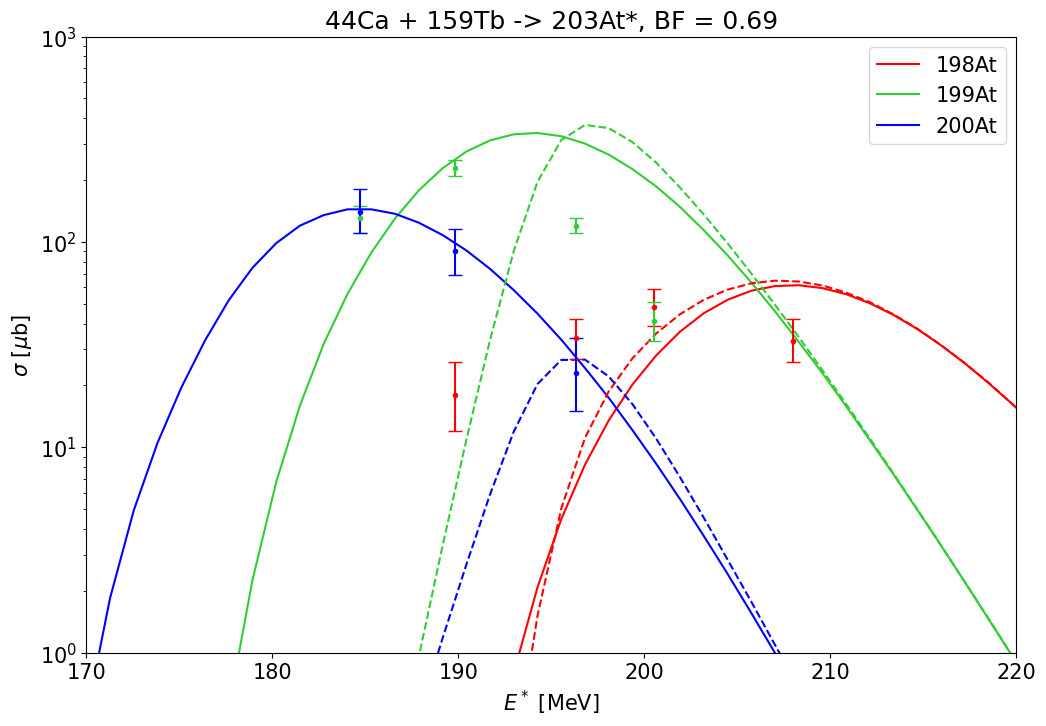

In [179]:
colors = ['red', 'limegreen', 'blue', 'gold', 'black', 'turquoise', 'magenta']
sns.color_palette("dark")

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm10[dfm10['isotope'].isin(list(df10.columns[3:-3]))], palette=colors)
plt.semilogy()
plt.ylim(1e0, 1e3)
# plt.xlim(right=50)
# plt.xlim(20, 80)
plt.xlim(170, 220)
plt.title(proj + ' + ' + trg + ' -> ' + cn + '*, BF = ' + bf)
if scale == mb:
    plt.ylabel('$\sigma$ [mb]')
elif scale == ub:
    plt.ylabel('$\sigma$ [$\mu$b]')
elif scale == nb:
    plt.ylabel('$\sigma$ [nb]')
plt.xlabel('$E^*$ [MeV]')
plt.legend(loc='upper right')

sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm0[dfm0['isotope'].isin(list(df10.columns[3:-3]))], linestyle='--', legend=None, palette=colors)


# sns.scatterplot(x='E', y='CS', hue='isotope', data=dfm_exp)
for i in range(len(exp)):
    (_, caps, _) = plt.errorbar(e_lab, exp[i], yerr=[err_min[i], err_max[i]], marker='.', capsize=5, color=colors[i], ls='none')
    for cap in caps:
        cap.set_markeredgewidth(1)

plt.rcParams.update({'font.size': 15})

plt.savefig(proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_' + 'barfac' + bf + '.png')
plt.savefig(proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_' + 'barfac' + bf + '.pdf')